Проанализировав этот датасет, можно ответить на вопрос от каких параметров зависит цена жилья на Airbnb, судя по имеющимся данным?

In [191]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [118]:
ab = pd.read_csv('AB_NYC_2019.csv', index_col=0)
ab.dropna()  #удаление пустых значений
ab.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
dropped_ab = ab.drop(columns=['name', 'host_id', 'host_name',
                              'latitude', 'longitude', 'last_review']) 
#удаляем столбцы, которые не будем использовать в анализе

Самым первым можно посмотреть, как зависит цена от группы района жилья(neighbourhood_group). Наглядно это можно показать на гистограмме.

In [94]:
ab.neighbourhood_group.value_counts()
#названия районов, встречающихся в таблице, и их количество

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [95]:
ab1 = ab[ab.neighbourhood_group == 'Manhattan']
p1 = ab1.price.mean()  #расчет средней цены для конкретного района

In [96]:
ab2 = ab[ab.neighbourhood_group == 'Brooklyn']
p2 = ab2.price.mean()

In [97]:
ab3 = ab[ab.neighbourhood_group == 'Queens']
p3 = ab3.price.mean()

In [98]:
ab4 = ab[ab.neighbourhood_group == 'Staten Island']
p4 = ab4.price.mean()

In [99]:
ab5 = ab[ab.neighbourhood_group == 'Bronx']
p5 = ab5.price.mean()

In [100]:
x = np.array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'])
y = np.array([p1, p2, p3, p4, p5])

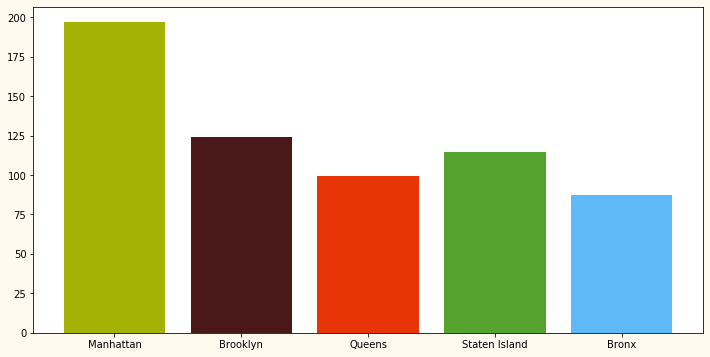

In [109]:
fig, ax = plt.subplots()  #построение гистограммы с помощью matplotlib
color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y, color=color_rectangle)
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #ширина столбцов
fig.set_figheight(6)    #высота столбцов

plt.show()

Видно, что наиболее высокие цены в районе Manhattan. Наиболее дешевое жилье в районе Bronx. 

Теперь посмотрим, влияет ли тип жилья на цену. 

In [102]:
dropped_ab[['price', 'room_type']]  #выделяем из dataframe 2 нужных столбца

,price,room_type
id,,
2539,149,Private room
2595,225,Entire home/apt
3647,150,Private room
3831,89,Entire home/apt
5022,80,Entire home/apt
...,...,...
36484665,70,Private room
36485057,40,Private room
36485431,115,Entire home/apt


In [21]:
dropped_ab.room_type.value_counts()
#выводится список типов жилья и их количество в таблице

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [22]:
pr = ab[ab.room_type == 'Private room']
price_for_pr = pr.price.mean()

In [23]:
eh = ab[ab.room_type == 'Entire home/apt']
price_for_eh = eh.price.mean()

In [24]:
sr = ab[ab.room_type == 'Shared room']
price_for_sr = sr.price.mean()

In [52]:
d = {"room_type": np.array(['Private room', 'Entire home/apt', 'Shared room']), 
      ...: "": np.array([price_for_pr, price_for_eh, price_for_sr])}
#вывод нового dataframe со средними значениями типов комнат
df = pd.DataFrame(d, index=['1', '2', '3'])
print(df)

         room_type            
1     Private room   89.780973
2  Entire home/apt  211.794246
3      Shared room   70.127586


Для типа Entire home/apt средняя цена самая высокая, и также превышает другие более, чем в 2 раза. Наименее дорогое жилье для типа Shared room

Далее рассмотрим зависимость цены жилья от количества отзывов в месяц

In [26]:
#датафрейм со значениями цены, типа жилья и количества отзывов в месяц
dropped_ab[['price', 'room_type', 'reviews_per_month']] 

,price,room_type,reviews_per_month
id,,,
2539,149,Private room,0.21
2595,225,Entire home/apt,0.38
3647,150,Private room,NaN
3831,89,Entire home/apt,4.64
5022,80,Entire home/apt,0.10
...,...,...,...
36484665,70,Private room,NaN
36485057,40,Private room,NaN
36485431,115,Entire home/apt,NaN


Посмотрим зависимость между количеством отзывов в месяц для каждого из типов жилья

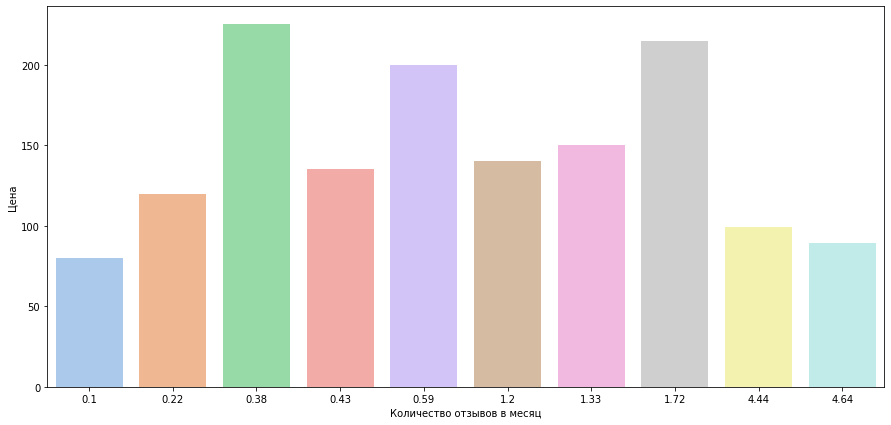

In [33]:
#построение столбачтой диаграммы
plt.figure(figsize=(15, 7)) 
sns.barplot(x='reviews_per_month', y='price', data=eh.head(10),
            palette = 'pastel')
plt.xlabel('Количество отзывов в месяц')
plt.ylabel('Цена')
plt.show()

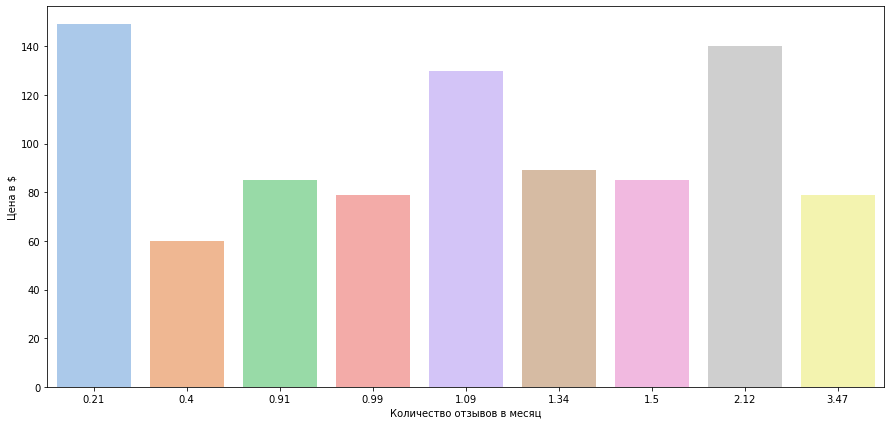

In [37]:
plt.figure(figsize=(15, 7))
sns.barplot(x='reviews_per_month', y='price', data=pr.head(10),
            palette = 'pastel')
plt.xlabel('Количество отзывов в месяц')
plt.ylabel('Цена в $')
plt.show()

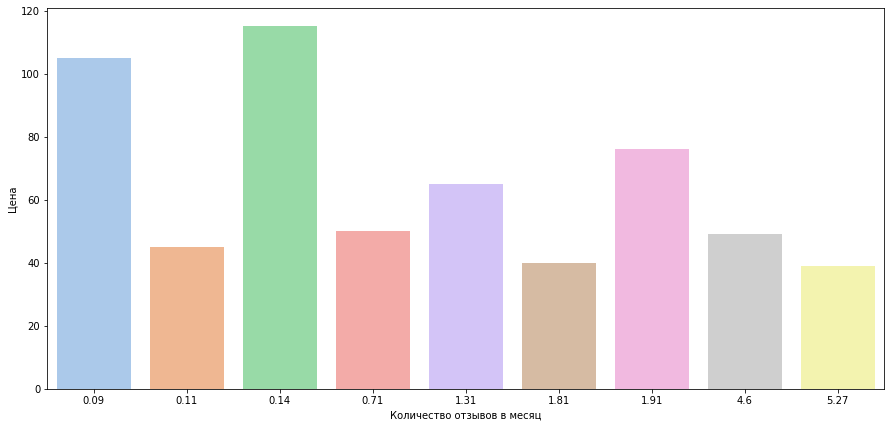

In [38]:
plt.figure(figsize=(15, 7))
sns.barplot(x='reviews_per_month', y='price', data=sr.head(10),
            palette = 'pastel')
plt.xlabel('Количество отзывов в месяц')
plt.ylabel('Цена')
plt.show()

Видим, что нет прямой зависимости между количеством отзывов и ценой для любого из типов жилья:
    возможна как высокая цена при большом количестве отзывов, так и низкая.

Также отдельным пунктом посмотрим влияние минимального количества проведенных ночей на цену 

In [44]:
#какие есть значения минимального количества ночей в датафрейме
dropped_ab.minimum_nights.value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [57]:
one = ab[ab.minimum_nights == 1]
price_for_one = one.price.mean()
price_for_one

142.02287735849058

In [58]:
two = ab[ab.minimum_nights == 2]
price_for_two = two.price.mean()
price_for_two

146.2701778385773

In [59]:
three = ab[ab.minimum_nights == 3]
price_for_three = three.price.mean()
price_for_three

160.25128141017626

Для жилья с 3 минимальными ночями средняя цена наиболее высокая, а с минимум 1 ночью - наиболее низкая. 

Предварительно получаем, что наиболее дорогое жилье в районе Manhattan, с минимум 3 ночами проживания и типом жилья Entire home/apt. 
Самое дешевое: район Bronx, минимум 1 ночь и тип Shared room.
Сравним средние цены по таким результатам:

In [71]:
#выделяем датафрейм с необходимыми характеристиками
needfull_ab = ab[['price', 'room_type', 'minimum_nights', 'neighbourhood_group']]
needfull_ab

,price,room_type,minimum_nights,neighbourhood_group
id,,,,
2539,149,Private room,1,Brooklyn
2595,225,Entire home/apt,1,Manhattan
3647,150,Private room,3,Manhattan
3831,89,Entire home/apt,1,Brooklyn
5022,80,Entire home/apt,10,Manhattan
...,...,...,...,...
36484665,70,Private room,2,Brooklyn
36485057,40,Private room,4,Brooklyn
36485431,115,Entire home/apt,10,Manhattan


In [86]:
#фильтруем по данным для самого дорогого жилья
room_type_filter = needfull_ab['room_type']=='Entire home/apt'
minimum_nights_filter = needfull_ab['minimum_nights']==3
neighbourhood_group_filter = needfull_ab['neighbourhood_group']=='Manhattan'
the_most_expensive = needfull_ab.loc[needfull_ab.price & room_type_filter & minimum_nights_filter & neighbourhood_group_filter]
the_most_expensive

,price,room_type,minimum_nights,neighbourhood_group
id,,,,
30927,105,Entire home/apt,3,Manhattan
33014,195,Entire home/apt,3,Manhattan
44506,165,Entire home/apt,3,Manhattan
47370,125,Entire home/apt,3,Manhattan
57468,189,Entire home/apt,3,Manhattan
...,...,...,...,...
36276575,299,Entire home/apt,3,Manhattan
36312994,103,Entire home/apt,3,Manhattan
36345911,299,Entire home/apt,3,Manhattan


In [84]:
the_most_expensive.price.mean()  #расчет средней цены

236.40276301806588

In [89]:
room_type_filter2 = needfull_ab['room_type']=='Shared room'
minimum_nights_filter2 = needfull_ab['minimum_nights']==1
neighbourhood_group_filter2 = needfull_ab['neighbourhood_group']=='Bronx'
the_most_cheap = needfull_ab.loc[needfull_ab.price & room_type_filter2 & minimum_nights_filter2 & neighbourhood_group_filter2]
the_most_cheap

,price,room_type,minimum_nights,neighbourhood_group
id,,,,
4278389,45,Shared room,1,Bronx
7791636,45,Shared room,1,Bronx
20783768,55,Shared room,1,Bronx
20802874,45,Shared room,1,Bronx
28369910,55,Shared room,1,Bronx
32896994,77,Shared room,1,Bronx
33533803,35,Shared room,1,Bronx
33987446,77,Shared room,1,Bronx
33995462,49,Shared room,1,Bronx


In [90]:
the_most_cheap.price.mean()

56.666666666666664

Средняя цена для предположительно наиболее дешевого дилья получилась более, чем в 4 раза меньше, что соответствует предположению

На цену могут влиять и другие параметры. Рассмотрим их все вместе с помощью корреляции.

In [45]:
ab_drop = dropped_ab.drop(columns=['calculated_host_listings_count'])
#удаляем еще один ненужный столбец
ab_drop

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
id,,,,,,,,
2539,Brooklyn,Kensington,Private room,149,1,9,0.21,365
2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
3647,Manhattan,Harlem,Private room,150,3,0,NaN,365
3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
...,...,...,...,...,...,...,...,...
36484665,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,9
36485057,Brooklyn,Bushwick,Private room,40,4,0,NaN,36
36485431,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,27


In [6]:
def Encode(ab_drop):
#необходимо перевести столбцы, заполненные буквами в числовой вид
    for column in ab_drop.columns[ab_drop.columns.isin(['neighbourhood_group',
                                                        'room_type',
                                                        'neighbourhood'])]:
        ab_drop[column] = ab_drop[column].factorize()[0]
    return ab_drop

ab_drop_en = Encode(ab_drop.copy())

In [411]:
ab_drop_en
final = ab_drop_en.dropna()
final.head(25)
#как выглядит перевод в числовой вид

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
id,,,,,,,,
2539,0,0,0,149,1,9,0.21,365
2595,1,1,1,225,1,45,0.38,355
3831,0,3,1,89,1,270,4.64,194
5022,1,4,1,80,10,9,0.10,0
5099,1,5,1,200,3,74,0.59,129
5121,0,6,0,60,45,49,0.40,0
5178,1,7,0,79,2,430,3.47,220
5203,1,8,0,79,2,118,0.99,0
5238,1,9,1,150,1,160,1.33,188


(8.0, 0.0)

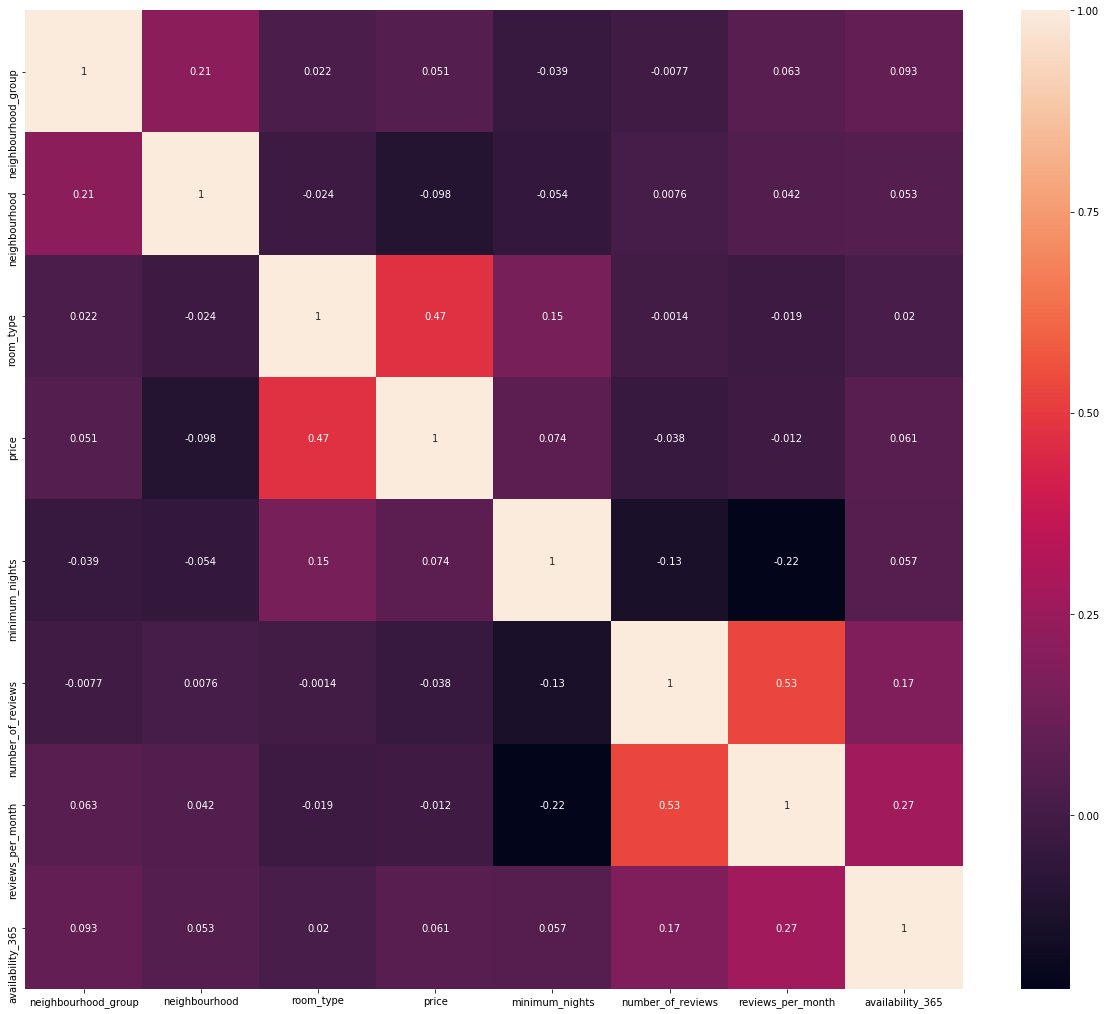

In [8]:
corr = ab_drop_en.corr(method='kendall')
plt.figure(figsize=(21, 18))
sns.heatmap(corr, annot=True)
b, t = plt.ylim()
b += 0.5  #в текущей версии matplotlib обрезается верхняя и нижняя строчки
t -= 0.5  #это нужно, что не обрезалось
plt.ylim(b, t)


Таким образом, видно, что наибольшая корреляция существует между ценой и типом жилья: коэффициент 0,47. И характерно отсутствие корреляции между ценой и количеством отзывов. Исходя из анализа, наиболее значимыми факторами для цены являются тип жилья(room_type) и район расположения(neighbourhood_group).   

In [362]:
#обучим модель предсказывать цену по характеристикам
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [500]:
X = np.array([149, 225, 89, 80, 200, 60, 79, 79, 150, 135, 85, 89, 85, 120,
             140, 215, 140, 99, 299, 130]).reshape(-1, 1) #одномерный массив со значениями цен из датасета
y = final.head(20)

In [501]:
#разделение на тренировочную и тестовую части 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16, 1) (16, 8)
(4, 1) (4, 8)


In [502]:
#тренировка модели
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [503]:
#предсказания для первых 7 
predictions[0:7]

array([[3.17816840e-01, 1.06285195e+01, 8.90019189e-01, 2.25000000e+02,
        6.23214675e-02, 9.14705487e+01, 7.99068351e-01, 1.45957404e+02],
       [5.25884623e-01, 8.48309954e+00, 5.15966002e-01, 1.20000000e+02,
        6.05844651e+00, 1.35688413e+02, 1.57888832e+00, 1.35013530e+02],
       [5.95240550e-01, 7.76795956e+00, 3.91281607e-01, 8.50000000e+01,
        8.05715485e+00, 1.50427701e+02, 1.83882831e+00, 1.31365572e+02],
       [5.87314159e-01, 7.84968984e+00, 4.05531252e-01, 8.90000000e+01,
        7.82873104e+00, 1.48743211e+02, 1.80912088e+00, 1.31782481e+02]])

Text(0, 0.5, 'Predictions')

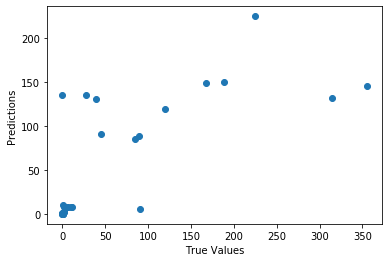

In [504]:
#построение графика
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [505]:
print (model.score(X_test, y_test))

0.09512548338677444


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
